# OPTIMIZATION THEORY - HOMEWORK PROBLEM SET #2
202060410 정순규

## import numpy and matplotlib


In [53]:
import numpy as np
import matplotlib.pyplot as plt

## import symbols and functions from local files


In [54]:
from linalg import Vector, Matrix
from steepest_descent import sda

## Problem 2

### define an objective function $f(\bold x)$ and its gradient $\nabla f(\bold x)$
$f(\bold x)=\frac{1}{2}\bold x^TQ\bold x+\bold c^T\bold x$

$\nabla f(\bold x)=Q\bold x+\bold c$

In [55]:
Q = Matrix([
	[10, -18, 2],
	[-18, 40, -1],
	[2, -1, 3]
])
c = Vector([12, -47, -8])
f = lambda x: 0.5 * x.T @ Q @ x + c @ x # an objective function f(x) (lambda function)
gradf = lambda x: Q @ x + c # the gradient of f(x) (lambda function)

### minimize $f(\bold x)$ starting from various points $x_0$


sda: status=0, x0=[0 0 0], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=104
sda: status=0, x0=[15.09  7.66 -6.56], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=311
sda: status=0, x0=[11.77  6.42 -4.28], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=88
sda: status=0, x0=[4.46 2.25 1.85], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=58


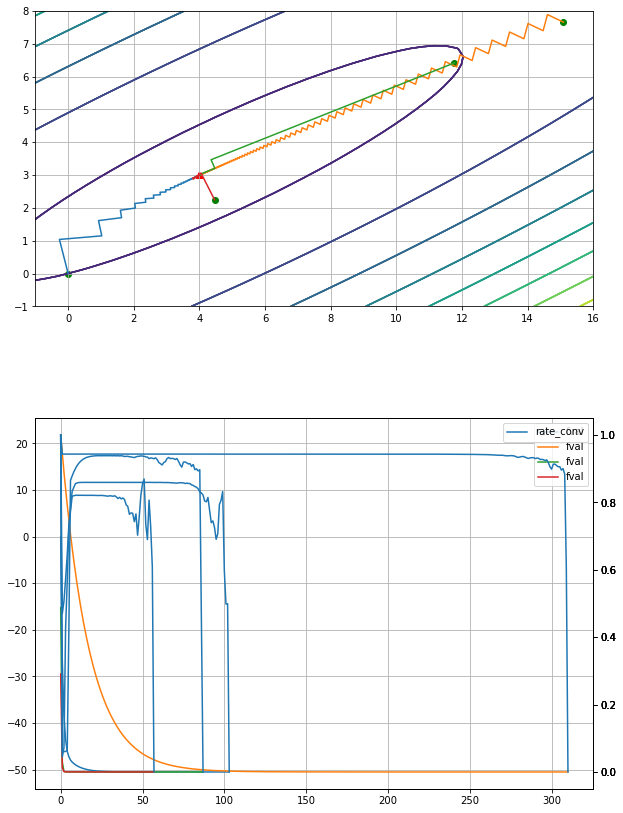

In [56]:
fig, ax = plt.subplots(1,3, figsize=(10,15)) # create a figure and an axes of matplotlib
for x0 in [ # iterate with four different starting points
	Vector([0, 0, 0]),
	Vector([15.09, 7.66, -6.56]),
	Vector([11.77, 6.42, -4.28]),
	Vector([4.46, 2.25, 1.85])
]:
	# minimize f(x) using the steepest descent algorithm
	# sda() function description
	# 1. input arguments
	# 	- f: an objective function f(x) (function)
	# 	- gradf: the gradient of f(x) (function)
	# 	- x0: a starting point of optimization which is sequencially input by "for loop" (Vector = numpy.ndarray)
	# 	- epsilon: the first stopping criteria. sda() will stop if |gradf(xk)| <= epsilon. (float)
	# 	- max_num_iter: the second stopping criteria. sda() will stop if the number of iterations is greater than max_num_iter. (integer)
	# 2. return values
	# 	- xopt: the minimizer of f(x) (Vector = numpy.ndarray)
	# 	- fval_opt: the minimum of f(x) (float)
	# 	- status: 0 if the minimum is found within max_num_iter, 1 if the number of iterations reaches max_num_iter. (integer)
	# 	- history: the sequencially stored values of x, d, fval (dictionary)
	xopt, fval_opt, status, history = sda(f, gradf, x0, epsilon=1e-3, max_num_iter=1000)

	# print return values and actual number of iterations
	print(f"sda: {status=}, x0={np.round(x0,2)}, xopt={np.round(xopt,2)}, fval_opt={np.round(fval_opt,2)}, num_iter={len(history['x'])}")

	# plot f(x), xopt and search path (2D projection only)
	ax[0].set_aspect(1.0)
	ax[0].grid(True)
	x = np.linspace(-1,16,50)
	y = np.linspace(-1,8,40)
	[xx, yy] = np.meshgrid(x, y)
	zz = np.zeros_like(xx)
	for i in range(len(x)):
		for j in range(len(y)):
			zz[j,i] = f(Vector((x[i],y[j],0)))
	ax[0].contour(xx, yy, zz)
	ax[0].plot(history['x'][:,0], history['x'][:,1])
	ax[0].scatter(history['x'][0,0], history['x'][0,1], color='green')
	ax[0].scatter(history['x'][-1,0], history['x'][-1,1], marker='^', color='red')
	ax[1].grid(True)
	ax[1].plot(history['fval'], label='fval')
	ax[2].plot(history['rate_conv'], label='rate_conv')
ax[1].legend(loc='best')
twin.legend(loc='best')
plt.show()

## Problem 3

### define an objective function $f(\bold x)$ and its gradient $\nabla f(\bold x)$
$f(x_1,x_2)=-9x_1-10x_2+\theta(-\ln(100-x_1-x_2)-\ln(x_1)-\ln(x_2)-\ln(50-x_1+x_2))$

$\nabla f(x_1,x_2)=\begin{bmatrix}-9+\theta\left(\frac{1}{100-x_1-x_2}-\frac{1}{x_1}+\frac{1}{50-x_1+x_2}\right)\\-10+\theta\left(\frac{1}{100-x_1-x_2}-\frac{1}{x_x}-\frac{1}{50-x_1+x_2}\right)\end{bmatrix}$

In [57]:
f = lambda x,th: -9*x[0]-10*x[1]+th*(-np.log(100-x[0]-x[1])-np.log(x[0])-np.log(x[1])-np.log(50-x[0]+x[1])) # an objective function f(x) (lambda function)
gradf = lambda x,th: np.array([-9+th*(1/(100-x[0]-x[1])-1/x[0]+1/(50-x[0]+x[1])), -10+th*(1/(100-x[0]-x[1])-1/x[1]-1/(50-x[0]+x[1]))]) # the gradient of f(x) (lambda function)

In [58]:

def calc_alpha_max(x, d):
    epsilon = 0.1
    alpha_max = 150
    if d[0] < 0:
        alpha_max = min(alpha_max, (epsilon - x[0]) / d[0])
    if d[1] < 0:
        alpha_max = min(alpha_max, (epsilon - x[1]) / d[1])
    if d[0] + d[1] > 0:
        alpha_max = min(alpha_max, (100 - epsilon - x[0] - x[1]) / (d[0] + d[1]))
    if d[0] - d[1] > 0:
        alpha_max = min(alpha_max, (50 - epsilon - x[0] + x[1]) / (d[0] - d[1]))
    return alpha_max

### create figure and axes to plot results

### minimize $f(\bold x)$ starting from various points $x_0$


th = 10 -----
x0 = [ 8 90] -----
sda: status=0, x0=[ 8 90], xopt=[ 7.94 91.08], fval_opt=-1096.81, num_iter=4
x0 = [ 1 40] -----


<ipython-input-57-ec8bdc1efa7c>:1: RuntimeWarning: invalid value encountered in log
  f = lambda x,th: -9*x[0]-10*x[1]+th*(-np.log(100-x[0]-x[1])-np.log(x[0])-np.log(x[1])-np.log(50-x[0]+x[1])) # an objective function f(x) (lambda function)


sda: status=0, x0=[ 1 40], xopt=[ 7.95 91.07], fval_opt=-1096.81, num_iter=442
x0 = [15.   68.69] -----
sda: status=0, x0=[15.   68.69], xopt=[ 7.94 91.08], fval_opt=-1096.81, num_iter=14
x0 = [10 20] -----
sda: status=0, x0=[10 20], xopt=[ 7.94 91.08], fval_opt=-1096.81, num_iter=18
th = 100 -----
x0 = [ 8 90] -----
sda: status=0, x0=[ 8 90], xopt=[22.28 69.7 ], fval_opt=-2298.41, num_iter=20
x0 = [ 1 40] -----
sda: status=0, x0=[ 1 40], xopt=[22.29 69.69], fval_opt=-2298.41, num_iter=104
x0 = [15.   68.69] -----
sda: status=0, x0=[15.   68.69], xopt=[22.28 69.7 ], fval_opt=-2298.41, num_iter=12


<ipython-input-57-ec8bdc1efa7c>:1: RuntimeWarning: invalid value encountered in log
  f = lambda x,th: -9*x[0]-10*x[1]+th*(-np.log(100-x[0]-x[1])-np.log(x[0])-np.log(x[1])-np.log(50-x[0]+x[1])) # an objective function f(x) (lambda function)


x0 = [10 20] -----
sda: status=0, x0=[10 20], xopt=[22.28 69.69], fval_opt=-2298.41, num_iter=5


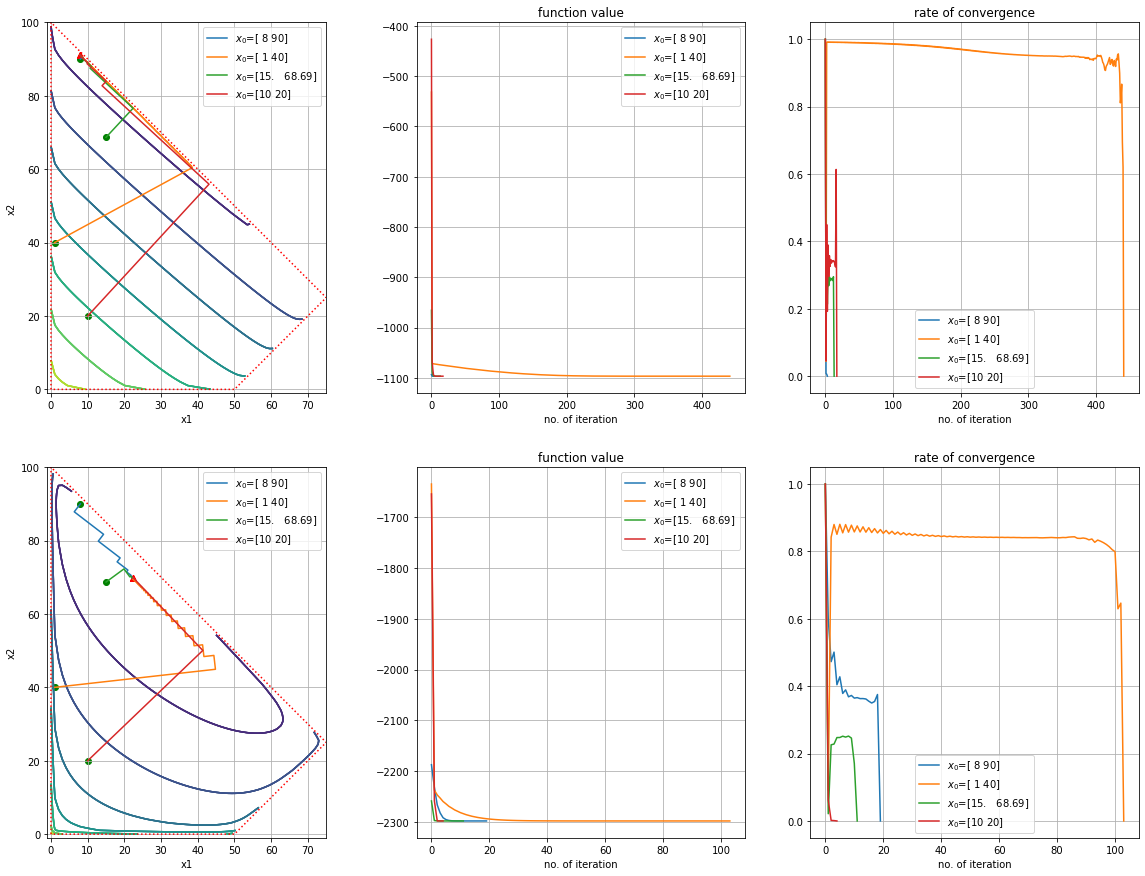

In [59]:
fig, ax = plt.subplots(2,3, figsize=(20,15))
for k, th in enumerate([10, 100]): # iterate with two different parameters
	print(f'th = {th} -----')
	f_th = lambda x: f(x,th) # newly define a function of x only
	gradf_th = lambda x: gradf(x,th)

	ax[k][0].set_aspect(1.0)
	ax[k][0].grid(True)
	x = np.linspace(-1,75,75)
	y = np.linspace(-1,100,100)
	[xx, yy] = np.meshgrid(x, y)
	zz = np.zeros_like(xx)
	for i in range(len(x)):
		for j in range(len(y)):
			zz[j,i] = f_th(Vector((x[i],y[j])))
	ax[k][0].plot([0, 0, 75, 50, 0], [0, 100, 25, 0, 0], linestyle='dotted', color='red')
	ax[k][1].grid(True)
	ax[k][2].grid(True)

	for x0 in [ # iterate with four different starting points
		Vector([8, 90]),
		Vector([1, 40]),
		Vector([15, 68.69]),
		Vector([10, 20])
	]:
		print(f'x0 = {x0} -----')

		xopt, fval_opt, status, history = sda(f_th, gradf_th, x0, epsilon=1e-3, max_num_iter=1000, alpha_max=calc_alpha_max, ls_epsilon=1e-6)

		print(f"sda: {status=}, x0={np.round(x0,2)}, xopt={np.round(xopt,2)}, fval_opt={np.round(fval_opt,2)}, num_iter={len(history['x'])}")

		ax[k][0].contour(xx, yy, zz)
		ax[k][0].plot(history['x'][:,0], history['x'][:,1], label=f'$x_0$={x0}')
		ax[k][0].scatter(history['x'][0,0], history['x'][0,1], color='green')
		ax[k][0].scatter(history['x'][-1,0], history['x'][-1,1], marker='^', color='red')
		ax[k][0].legend(loc='upper right')
		ax[k][0].set_xlabel('x1')
		ax[k][0].set_ylabel('x2')
		ax[k][1].plot(history['fval'], label=f'$x_0$={x0}')
		ax[k][1].set_xlabel('no. of iteration')
		ax[k][1].set_title('function value')
		ax[k][1].legend(loc='best')
		ax[k][2].plot(history['rate_conv'], label=f'$x_0$={x0}')
		ax[k][2].set_xlabel('no. of iteration')
		ax[k][2].set_title('rate of convergence')
		ax[k][2].legend(loc='best')
plt.show()